# Data Analysis for Hospitals

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Setting Display Options

In [2]:
pd.set_option('display.max_columns', 20)

### Reading CSV Files 

In [3]:
general = pd.read_csv('D:\Pycharm Project\Data Analysis for Hospitals/general.csv')
prenatal = pd.read_csv('D:\Pycharm Project\Data Analysis for Hospitals/prenatal.csv')
sports = pd.read_csv('D:\Pycharm Project\Data Analysis for Hospitals/sports.csv')

### Changing the Column Names

The Column Names of the Sports and Prenatal Tables Must Match the Column Names of the General Table

In [4]:
prenatal.rename(columns = {'HOSPITAL':'hospital', 'Sex':'gender'}, inplace = True)
sports.rename(columns = {'Hospital':'hospital', 'Male/female':'gender'}, inplace = True)

### Merging the Dataframes

In [5]:
df = pd.concat([general, prenatal, sports], ignore_index = True)

### Data Cleaning

In [6]:
del df["Unnamed: 0"] # Deleting the Unnamed: 0 column

df.dropna(axis=0, how="all", inplace=True) # Deleting all the empty rows

### Data Manipulation

In [7]:
# All the gender column values to f and m Respectively
df["gender"].replace(["female", "woman"], "f", inplace=True)
df["gender"].replace(["male", "man"], "m", inplace=True)

# Replace the NaN values in the gender column of the prenatal hospital with f
df.loc[(df["hospital"] == "prenatal") & (df["gender"].isnull()), "gender"] = "f"

# Replace the NaN values in the bmi, diagnosis, blood_test, ecg, ultrasound, mri, xray, children, months columns with zeros
df[["bmi", "diagnosis", "blood_test", "ecg", "ultrasound", "mri", "xray", "children", "months"]] = df[["bmi", "diagnosis", "blood_test", "ecg", "ultrasound", "mri", "xray", "children", "months"]].fillna(0)


### Q1 - What is the most common age of a patient among all hospitals? Plot a histogram and choose one of the following age ranges: 0-15, 15-35, 35-55, 55-70, or 70-80

Text(0.5, 0, 'Age')

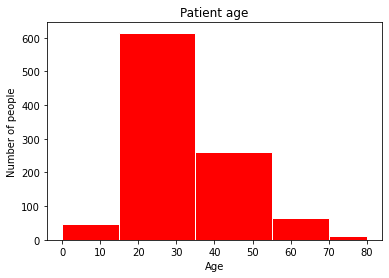

In [8]:
plt.figure(1)
plt.hist(df['age'], bins=[0,15,35,55,70,80], color = "r", edgecolor = "white", )
plt.title("Patient age")
plt.ylabel("Number of people")
plt.xlabel("Age")

### Q2 - What is the most common diagnosis among patients in all hospitals? Create a pie chart

([<matplotlib.patches.Wedge at 0x1e603d4b820>,
 [Text(0.6006446227216357, 0.9334484652060788, 'pregnancy'),
  Text(-0.9554236203489841, 0.5650360215767137, 'cold'),
  Text(-0.9353308682427004, -0.5977090989037697, 'stomach'),
  Text(-0.20113839190262991, -1.0916241785994043, 'sprain'),
  Text(0.44722616513862556, -1.0159176921460709, 'dislocation'),
  Text(0.9041180283912361, -0.6439492144089812, 'fracture'),
  Text(1.0928664193671291, -0.19427555023643625, 'heart')],
 [Text(0.330083981856034, 0.5129761835817189, '31.8%'),
  Text(-0.525052620191784, 0.3105152911367525, '19.4%'),
  Text(-0.514010657322565, -0.3284707660642338, '15.7%'),
  Text(-0.11053551266721102, -0.5999015756266997, '10.4%'),
  Text(0.2457729375987041, -0.5582971100982912, '8.6%'),
  Text(0.49685765524203057, -0.35388200071124193, '8.5%'),
  Text(0.6005842484810349, -0.10676404112092441, '5.6%')])

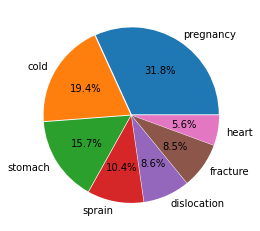

In [9]:
plt.figure(2)
explode = [0.01] * len(df['diagnosis'].value_counts())
plt.pie(df['diagnosis'].value_counts(), labels = ['pregnancy', 'cold', 'stomach', 'sprain', 'dislocation', 'fracture', 'heart'], autopct='%.1f%%', explode = explode)

### Q3 - Build a violin plot of height distribution by hospitals. Try to answer the questions. What is the main reason for the gap in values? Why there are two peaks, which correspond to the relatively small and big values?

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e603de6740>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e603de66e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e603de7310>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e603de7730>}

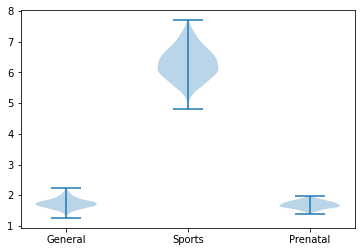

In [10]:
data_general = df.loc[df.hospital == 'general', 'height']

data_sports = df.loc[df.hospital == 'sports', 'height']

data_prenatal = df.loc[df.hospital == 'prenatal', 'height']
data_list = [data_general, data_sports, data_prenatal]

fig, axes = plt.subplots()

axes.set_xticks((1, 2, 3))
axes.set_xticklabels(("General", "Sports", "Prenatal"))

plt.violinplot(data_list)

In [11]:
plt.show() 

In [12]:
print("The answer to the 1st question: 15-35")
print("The answer to the 2nd question: pregnancy")
print("The answer to the 3rd question: It's because some hospitals measure patients' height in feet, while some hospitals measure it in meters.")

The answer to the 1st question: 15-35
The answer to the 2nd question: pregnancy
The answer to the 3rd question: It's because some hospitals measure patients' height in feet, while some hospitals measure it in meters.
